# Final Term Project
If we can see our future, we will certainly change how to live our lives today. However, we haven't invented the time machine yet. So instead of traveling to the future, we can first improve our ability to make predictions. With the skills we learned this semester in CS185C, we can see the trends and patterns in large amounts of data. We also know how to train Machine Learning models to make predictions. In this final term project, you are tasked to create a survival prediction model using data from patients with cardiovascular heart disease. Here is the link to the dataset: https://www.sjsu.edu/people/wendy.lee/docs/CS185C02-Sp21/heart_disease_clinical_data.csv

Your ML model will predict whether a patient will survive or die based on the following clinical features:

age: age of the patient (years)
anemia: decrease of red blood cells or hemoglobin (boolean)
high blood pressure: if the patient has hypertension (boolean)
creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
diabetes: if the patient has diabetes (boolean)
ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
platelets: platelets in the blood (kiloplatelets/mL)
sex: woman or man (binary)
serum creatinine: level of serum creatinine in the blood (mg/dL)
serum sodium: level of serum sodium in the blood (mEq/L)
smoking: if the patient smokes or not (boolean)
time: follow-up period (days)
[target] death event: if the patient deceased during the follow-up period (boolean)
For more information, please check Table 1, Table 2, and Table 3 of the following paper. (Links to an external site.)

 

Project Deliverables

1. Create and answer at least 5 unique questions using different types of plots to help you understand the data. You can create additional categorical columns or reshape your data to help you understand the data.

2. Create a test set and a training set using the original dataset. 

3. Follow the steps that we use in Hands-ons 15 and 16 to prepare the data and pipeline for training a few ML classifiers that can predict a binary outcome (survive or dead). Use any strategy that you see fit. Use N-fold cross-validation to evaluate the performance of each classifier.

4. Create a ROC plot that shows all the trained ML classifier's performance. Select the best one for testing.

5. Test your best ML classifier using the test set.

6. Create a pre-recorded slideshow presentation video (5-10 min long) in which you explain the following:

how the data visualization help you with choosing certain strategies in developing the ML training pipeline
what strategy is used to create test/train data
what ML models are chosen, and why are they suitable for this analysis
the performance of all trained models (including an image of the ROC curve)
how is the performance of the best ML model using the test set. 
To wrap up, discuss the challenges you have encountered and/or any other thoughts you have about this project. 
7. A url to access the pre-recorded presentation video

Note: For the pre-recorded presentation, you can use any screen recording tools such as Loom (Links to an external site.), OBS Studio (Links to an external site.), or even just Zoom meeting with screen recording. Your recording will need to be uploaded to a cloud platform such as Youtube (unlisted) or Zoom cloud recording will automatically save the video in the cloud. 

8. The presentation slides (in PDF format)

9. All the Python code for Steps 1-5 should be contained in one Jupyter notebook. 

 

What to upload to Canvas on May 17, 2021 by 11:59 pm:

1. Python Jupyter notebook that contains your code.

2. Presentation slides in PDF format

3. A url to your pre-recorded presentation video.

 

Peer Evaluations (due on May 21, 2020 by 11:59 pm)

You will be assigned to evaluate three other student's project presentation. A Google form will be provided to you to give your feedback to each student.

 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cardiovascular = "https://www.sjsu.edu/people/wendy.lee/docs/CS185C02-Sp21/heart_disease_clinical_data.csv"
cardio_df = pd.read_csv(cardiovascular)
# check df
cardio_df.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [ ]:
# get some info and stats
cardio_df.info()
cardio_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# PART 1
**Create and answer at least 5 unique questions.**

In [ ]:
# make a copy of original df to create questions and plots
cardio_copy = cardio_df.copy()
cardio_copy.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1


In [ ]:
''' from 'Machine Learning can predict survival of patients with heart failure...'''
# assignment of gender is based on article information
# 0 = Female
# 1 = Male  


# Gender    
def sex_to_gender(row):
  if row['sex'] ==0:
    return 'Female'
  if row['sex'] ==1:
    return 'Male'
cardio_copy['gender'] = cardio_copy.apply(lambda row: sex_to_gender(row), axis='columns')     

In [ ]:
# Age Group
'''from 'Gender based survival prediction models for heart failure - a case study in Pakistan'
The patients are categorized according to the age groups: 
<=45, 45 − 50, 50 − 55, 55 − 60, 60 − 65, 65 − 70,
and >70.'''

def age_to_group(row):
  if row['age'] <= 45:
    return '1'
  if row['age'] >= 46 and row['age'] <=50:
    return '2'
  if row['age'] >= 51 and row['age'] <=55:
    return '3'
  if row['age'] >= 56 and row['age'] <=60:
    return '4'
  if row['age'] >= 61 and row['age'] <=65:
    return '5'
  if row['age'] >= 66 and row['age'] <=70:
    return '6'
  if row['age'] >= 71:
    return '7'
cardio_copy['age_group'] = cardio_copy.apply(lambda row: age_to_group(row), axis='columns') 

In [ ]:
''' from 'Machine Learning can predict survival of patients with heart failure...' 
Ejection fraction value, given as a percentage with physiological values
ranging between 50% and 75%

from 'Gender based survival prediction models for heart failure- a case study in Pakistan'
The values of EF were divided into three categories as normal (50 − 75), borderline
(40 − 49) and very low (<40). A very low EF value (<40%) may be an evidence of heart failure
or cardiomyopathy, but a too high value (>75%) in general is not related to heart failure
although it may cause hypertrophic cardiomyopathy.'''

# Ejection Fraction percent (%)
def EF_to_category(row):
  if row['ejection_fraction'] <= 39:
    return 'Very Low'
  if row['ejection_fraction'] >=40 and row['ejection_fraction'] <= 49:
    return 'Borderline' 
  if row['ejection_fraction'] >=50 and row['ejection_fraction'] <=75:
    return 'Normal' 
  if row['ejection_fraction'] >=76:
    return 'High'

cardio_copy['EF_category'] = cardio_copy.apply(lambda row: EF_to_category(row), axis='columns') 

In [ ]:
'''from 'Gender based survival prediction models for heart failure- a case study in Pakistan'
The platelets count was also divided into two categories,
i.e., within the normal range (150000-450000) and outside the normal range

A normal platelet count ranges from 150,000 to 450,000 platelets per microliter of blood. 
Having more than 450,000 platelets is a condition called thrombocytosis; 
having less than 150,000 is known as thrombocytopenia. 
You get your platelet number from a routine blood test called a complete blood count (CBC).
from https://labtestsonline.org/tests/platelet-count'''

# Platelets Range/Counts 
def platelets_to_range(row):
  if row['platelets'] <= 149999:
    return 'Low'
  if row['platelets'] >=150000 and row['platelets'] <= 450000:
    return 'Normal' 
  if row['platelets'] >=450001:
    return 'High'   
cardio_copy['platelets_range'] = cardio_copy.apply(lambda row: platelets_to_range(row), axis='columns') 

In [ ]:
'''Normal Results
Total CPK normal values:
10 to 120 micrograms per liter (mcg/L)
from https://www.mountsinai.org/health-library/tests/creatine-phosphokinase-test#:~:text=Total%20CPK%20normal%20values%3A,per%20liter%20(mcg%2FL)'''

# CPK Levels enzyme in mcg/L
def CPK_to_range(row):
  if row['creatinine_phosphokinase'] <= 9:
    return 'Low'
  if row['creatinine_phosphokinase'] >=10 and row['creatinine_phosphokinase'] <= 120:
    return 'Normal' 
  if row['creatinine_phosphokinase'] >=121:
    return 'High' 
cardio_copy['CPK_range'] = cardio_copy.apply(lambda row: CPK_to_range(row), axis='columns') 

In [ ]:
'''from 'Gender based survival prediction models for heart failure- a case study in Pakistan'
The creatinine levels were observed on a continuous scale. In general, the normal creatinine
levels for men and women range from 0.9 to 1.3 mg/dL, and 0.6 to 1.1 mg/dL, respectively.
According to these limits, the values of creatinine were classified into two categories, i.e.,
within and outside the normal range.'''

# Serum creatinine in mg/dL
def creatinine_to_range(row):
  if row['serum_creatinine'] <= 0.8 and row['sex'] == 1:
    return 'Low'
  if row['serum_creatinine'] >= 0.9 and row['serum_creatinine'] <=1.3 and row['sex'] == 1:
    return 'Normal'
  if row['serum_creatinine'] >=1.4 and row['sex'] == 1:
    return 'High'
  if row['serum_creatinine'] <= 0.5 and row['sex'] == 0:
    return 'Low'
  if row['serum_creatinine'] >= 0.6 and row['serum_creatinine'] <=1.1 and row['sex'] == 0:
    return 'Normal'
  if row['serum_creatinine'] >=1.2 and row['sex'] == 0:
    return 'High'    
  
cardio_copy['creatinine_range'] = cardio_copy.apply(lambda row: creatinine_to_range(row), axis='columns') 

In [ ]:
''' from 'Machine Learning can predict survival of patients with heart failure...'
Regarding the dataset
imbalance, the survived patients (death event = 0) are
203, while the dead patients (death event = 1) are 96.'''

# Deat to Survival
def death_to_survival(row):
  if row['DEATH_EVENT'] ==0:
    return 'survive'
  if row['DEATH_EVENT'] ==1:
    return 'dead'
cardio_copy['Outcome'] = cardio_copy.apply(lambda row: death_to_survival(row), axis='columns')   

In [ ]:
# make Columns into 'Bool' type
# easier to create plots
cardio_copy = cardio_copy.astype({'anaemia':bool, 'diabetes': bool, 'high_blood_pressure':bool, 'smoking': bool})
cardio_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
 13  gender                    299 non-null    object 
 14  age_group 

# Question #1.1
Is there a correlation between the patient's age and ejection fraction?

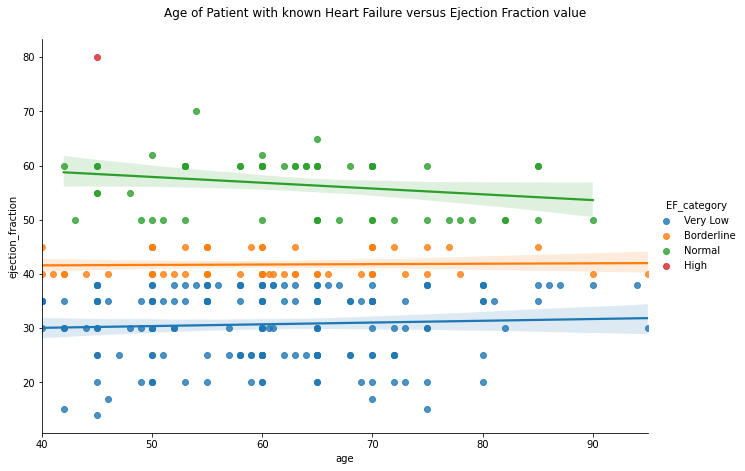

In [ ]:
# maybe older patients do no pump as much blood out of the heart?
# relationship between 'ejection fraction' = percent of blood leaving the body 
# and 'age' = age of patient
# keep ci 
g = sns.lmplot(data = cardio_copy, 
               y = 'ejection_fraction',
               x = 'age',
               hue = 'EF_category', # color each category of EF
               height = 6,
               aspect = 1.5 # make plot a little wider
               )
g.fig.suptitle('Age of Patient with known Heart Failure versus Ejection Fraction value', y = 1.05);

# Question #1.2
Is the distribution of ejection fraction (percent) for Women and Men different?

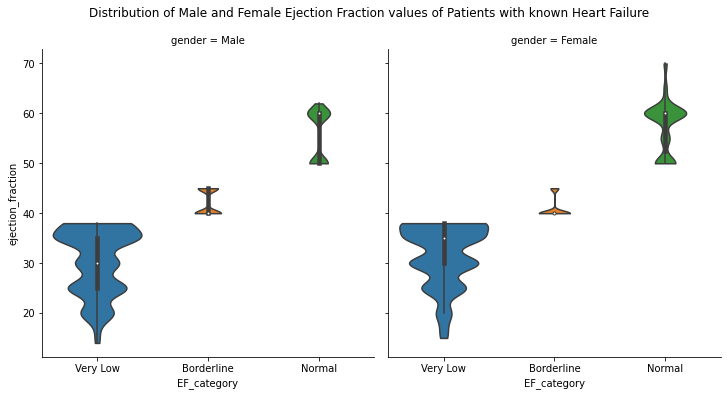

In [ ]:
# because there is only one value in 'High' we will only look at ['Very Low','Borderline','Normal']
g=sns.catplot(data=cardio_copy[cardio_copy['EF_category'].isin(['Very Low','Borderline','Normal'])],
              x = 'EF_category',
              y = 'ejection_fraction',
              kind = 'violin',
              bw =0.25,
              col = 'gender',
              cut = 0, # stop at last value 
              scale = 'count', # count, the width of the violins will be scaled by the number of observations in that bin
              aspect = 1
              )
g.fig.suptitle('Distribution of Male and Female Ejection Fraction values of Patients with known Heart Failure ', y = 1.05);

# Question #2.1
Is there a correlation between the patient's age and serum creatinine levels?

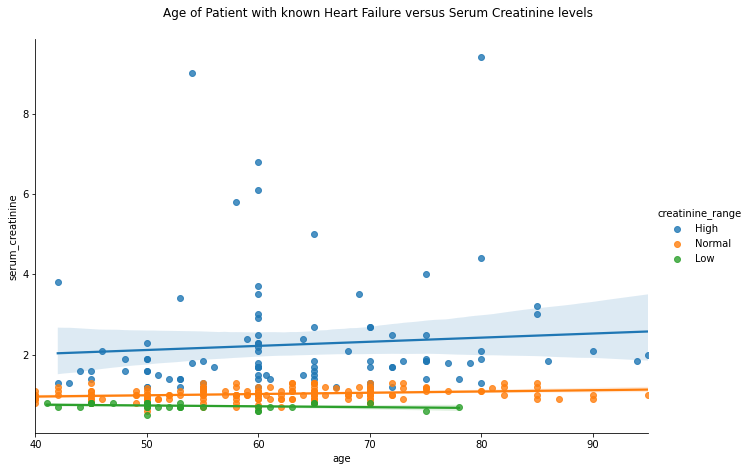

In [ ]:
g = sns.lmplot(data = cardio_copy, 
               y = 'serum_creatinine',
               x = 'age',
               hue = 'creatinine_range', # color each category of EF
               height = 6,
               aspect = 1.5 # make plot a little wider
               )
g.fig.suptitle('Age of Patient with known Heart Failure versus Serum Creatinine levels', y = 1.05);

# Question #2.2
Do Women or Men have higher serum creatinie levels? Did they survive or die before the end of the follow-up period?

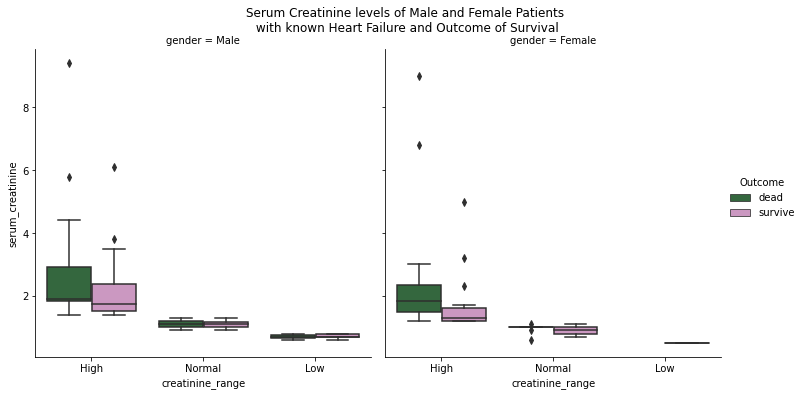

In [ ]:
g=sns.catplot(data=cardio_copy,
              x = 'creatinine_range',
              y = 'serum_creatinine',
              kind = 'box',
              col = 'gender',
              hue = 'Outcome',
              palette ='cubehelix'

              )
g.fig.suptitle('Serum Creatinine levels of Male and Female Patients\n with known Heart Failure and Outcome of Survival', y = 1.05);

# Question #2.3
Do patients with higher levels of serum creatinine also have high blood pressure? How do these values differ with patients who survived and patients who died before the end of the follow-up period?

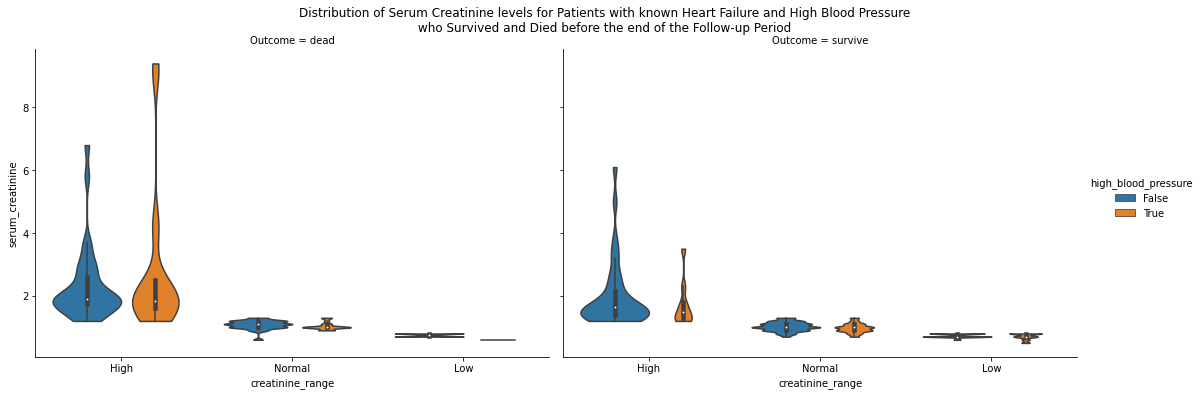

In [ ]:
g=sns.catplot(data=cardio_copy,
              x = 'creatinine_range',
              y = 'serum_creatinine',
              kind = 'violin',
              hue = 'high_blood_pressure',
              col = 'Outcome',
              scale ='count', # show how many in each bin
              bw = 0.25,
              aspect = 1.5,
              cut = 0

              )
g.fig.suptitle('Distribution of Serum Creatinine levels for Patients with known Heart Failure and High Blood Pressure\n who Survived and Died before the end of the Follow-up Period ', y = 1.05);

# Question #2.4
When looking at the survival outcome of the patient and gender, is there a pattern with serum creatinine levels and age group?

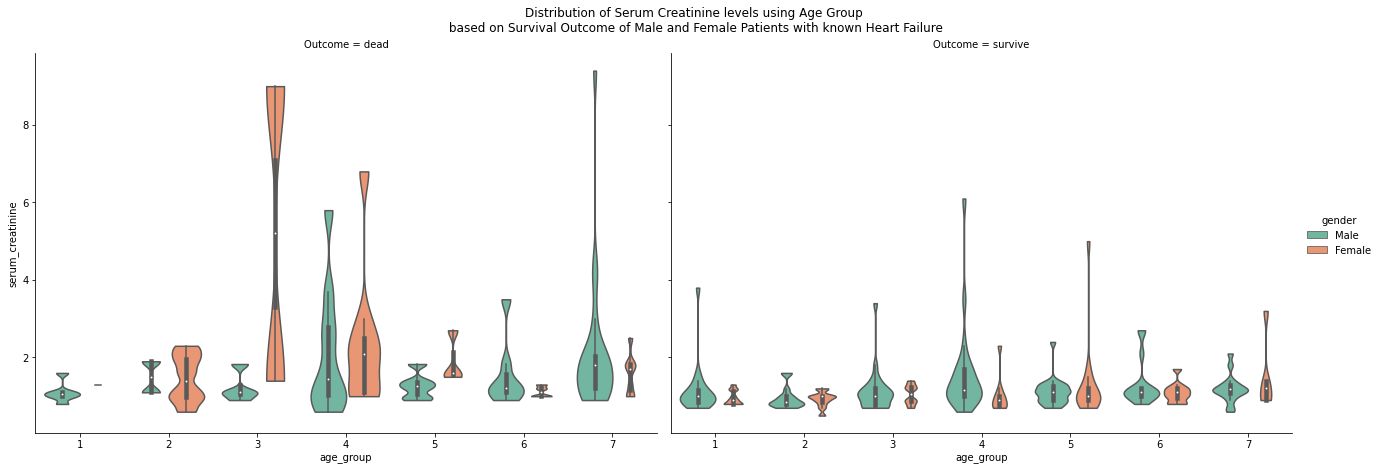

In [ ]:
g = sns.catplot(data = cardio_copy[cardio_copy['EF_category'].isin(['Very Low','Borderline','Normal'])].sort_values('age_group',ascending = True),
               y = 'serum_creatinine',
               x = 'age_group',
                kind = 'violin',
                col = 'Outcome',
                palette ='Set2',
                scale='count',
                cut = 0,
                bw = .25,
               hue = 'gender', # color each category of E
               height = 6,
               aspect = 1.5 # make plot a little wider
               )
g.fig.suptitle('Distribution of Serum Creatinine levels using Age Group\n based on Survival Outcome of Male and Female Patients with known Heart Failure', y = 1.05);

# Question #3
When looking at each gender and ejection fraction, which age group has the highest serum creatinine levels?

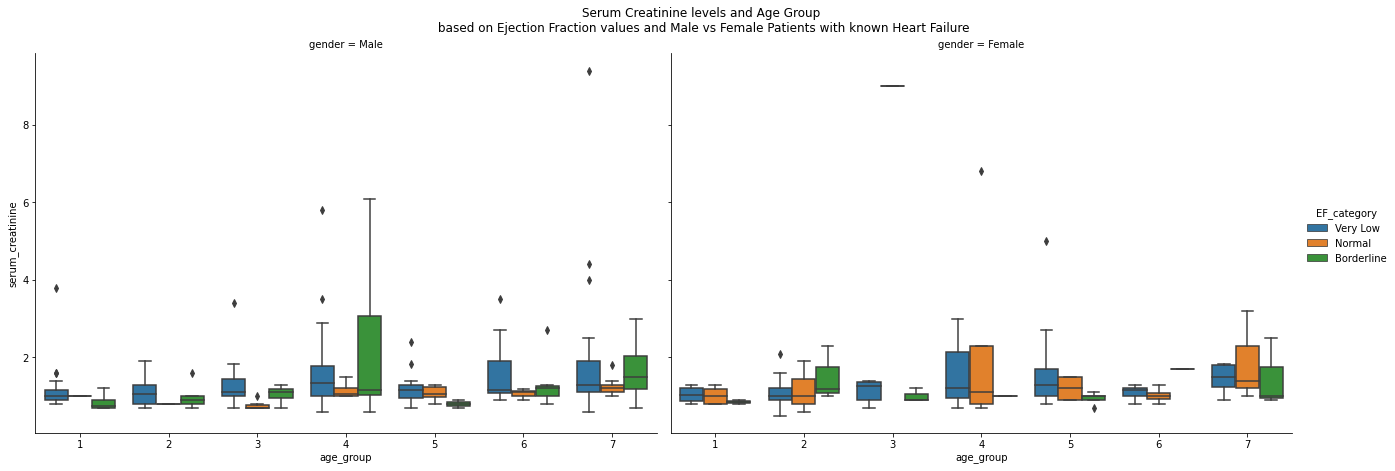

In [ ]:
g = sns.catplot(data = cardio_copy[cardio_copy['EF_category'].isin(['Very Low','Borderline','Normal'])].sort_values('age_group',ascending = True),
               y = 'serum_creatinine',
               x = 'age_group',
                kind = 'box',
                col = 'gender',
               hue = 'EF_category', # color each category of E
               height = 6,
               aspect = 1.5 # make plot a little wider
               )
g.fig.suptitle('Serum Creatinine levels and Age Group\n based on Ejection Fraction values and Male vs Female Patients with known Heart Failure', y = 1.05);

# Question #4
Is there a difference in the patient's serum creatinine levels among the different ejection fraction values? Which provides more information on if the patient survived or died before the end of the follow-up period?

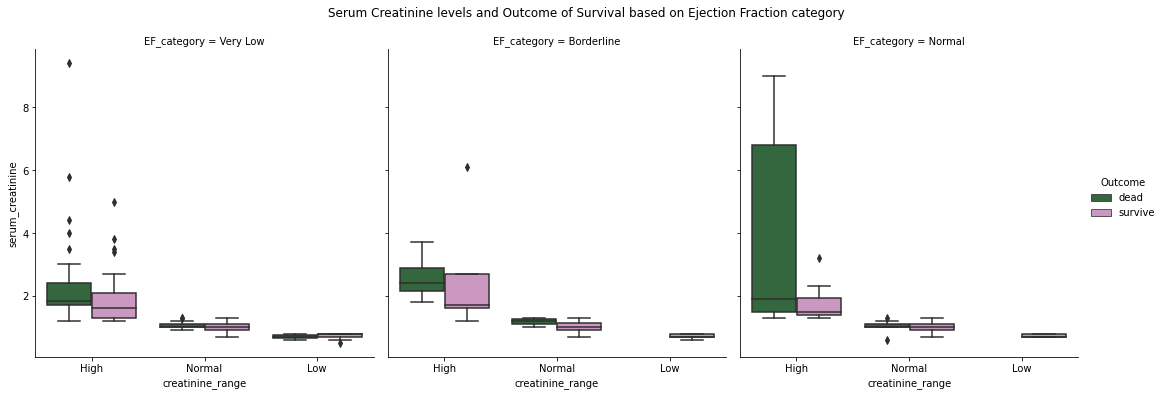

In [ ]:
g=sns.catplot(data=cardio_copy[cardio_copy['EF_category'].isin(['Very Low','Borderline','Normal'])],
              x = 'creatinine_range',
              y = 'serum_creatinine',
              kind = 'box',
              hue = 'Outcome',
              col = 'EF_category',
              palette ='cubehelix'

              )

g.fig.suptitle('Serum Creatinine levels and Outcome of Survival based on Ejection Fraction category', y = 1.05);

# Question #5.1
Is there a correlation between the patient's age and creatinine phosphokinase levels? 

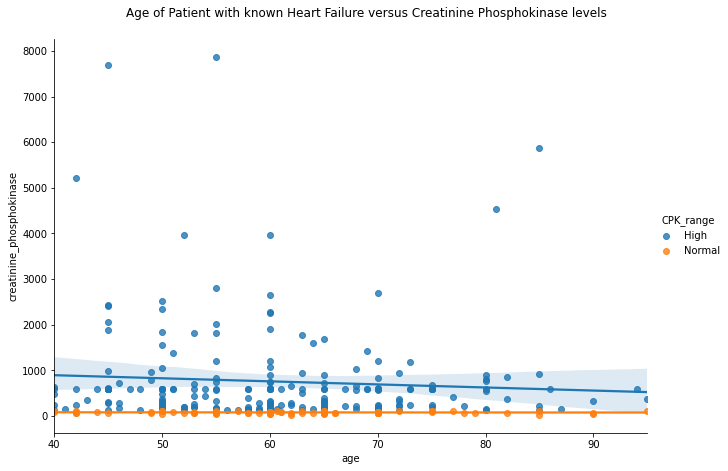

In [ ]:
g = sns.lmplot(data = cardio_copy, 
               y = 'creatinine_phosphokinase',
               x = 'age',
               hue = 'CPK_range', # color each category of EF
               height = 6,
               aspect = 1.5 # make plot a little wider
               )
g.fig.suptitle('Age of Patient with known Heart Failure versus Creatinine Phosphokinase levels', y = 1.05);

# Question #5.2
Are patients with higher or lower creatinine phosphokinase levels more likely to survive or die before the end of the follow-up period? Is there a difference between men and women?

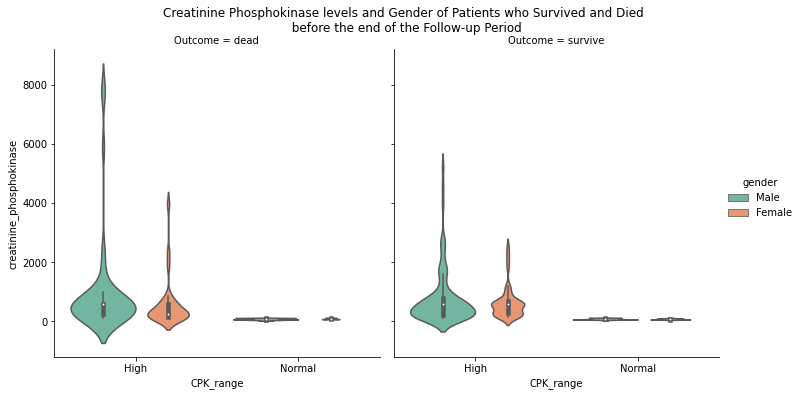

In [ ]:
g=sns.catplot(data=cardio_copy,
              x = 'CPK_range',
              y = 'creatinine_phosphokinase',
              kind = 'violin',
              bw =.25,
              scale = 'count',
              hue = 'gender',
              col = 'Outcome',
              palette ='Set2'

              )

g.fig.suptitle('Creatinine Phosphokinase levels and Gender of Patients who Survived and Died\n  before the end of the Follow-up Period', y = 1.05);

# Question #5.3
When looking at the survival outcome of the patient and gender, is there a pattern with creatinine phospokinase levels and age group?

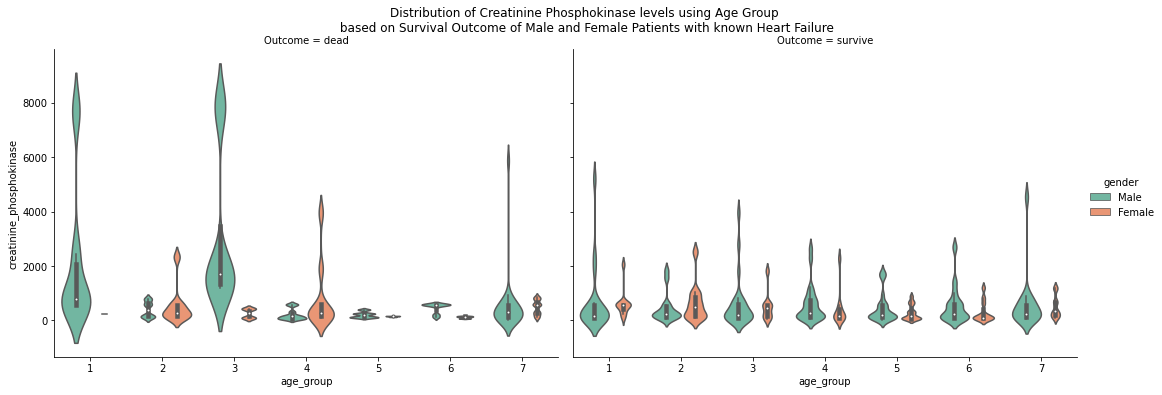

In [ ]:
g=sns.catplot(data=  cardio_copy[cardio_copy['EF_category'].isin(['Very Low','Borderline','Normal'])].sort_values('age_group',ascending = True),
              x = 'age_group',
              y = 'creatinine_phosphokinase',
              kind = 'violin',
              bw =.25,
              scale = 'count',
              hue = 'gender',
              col = 'Outcome',
              palette ='Set2',
              aspect = 1.5

              )

g.fig.suptitle('Distribution of Creatinine Phosphokinase levels using Age Group\n based on Survival Outcome of Male and Female Patients with known Heart Failure', y = 1.05);

# PART 2
**Create a test set and a training set using the original dataset.**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

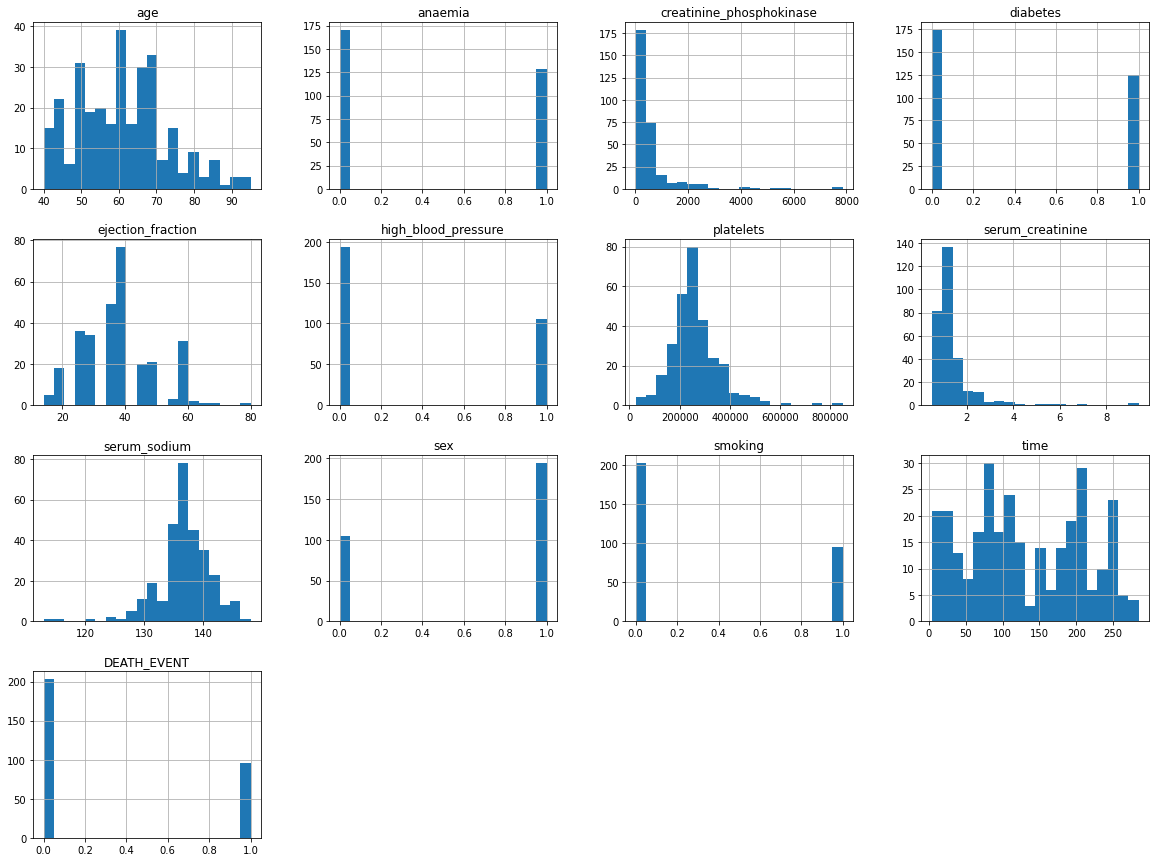

In [ ]:
# look at the distribution of each numerical attribute
# selection one attribute to split data 
cardio_df.hist(bins=20, figsize=(20,15))
plt.show()

In [ ]:
# going to use attribute 'serum_creatinine' to 'cut()' and split data
# It is important to have sufficient number of instances in our dataset for each stratum, 
# or else the estimate of the stratum's importance may be biased.

# using statistic values for bins to get even distribution
# min = 0.5, 25th = 0.9, 50th = 1.1, 75th = 1.4, max = 9.4

# cardio_df["creatinine_cat"] = pd.cut(cardio_df["serum_creatinine"],
#                               bins=[0.0, 0.9, 1.1, 1.4, np.inf],
#                               labels=[1, 2, 3, 4])
# cardio_df["creatinine_cat"].hist(); 

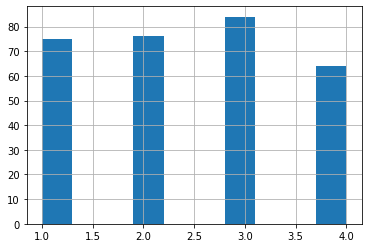

In [ ]:
# going to use attribute 'creatinine_phosphokinase' to 'cut()' and split data
# min = 23, 25th = 116.5, 50th = 250, 75th = 582, max = 7861
cardio_df["CPK_cat"] = pd.cut(cardio_df["creatinine_phosphokinase"],
                              bins=[0.0, 116.5, 250.0, 582.0, np.inf],
                              labels=[1, 2, 3, 4])
cardio_df["CPK_cat"].hist(); 

In [ ]:
# # min = 40, 25th = 51, 50th = 60, 75th = 70, max = 95
# cardio_df["age_cat"] = pd.cut(cardio_df["age"],
#                               bins=[0.0, 51.0, 60, 70, np.inf],
#                               labels=[1, 2, 3, 4])
# cardio_df["age_cat"].hist(); 

In [ ]:
# use 'StratifiedShuffleSplit(n_splits=10, *, test_size=None, train_size=None, random_state=None)' to create training and test set
# n_splitsint, default=10; Number of re-shuffling & splitting iterations.


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# # split(X, y, groups=None), where X is traning data and y is target variable
# for train_index, test_index in split.split(cardio_df, cardio_df["creatinine_cat"]):
#     strat_train_set = cardio_df.loc[train_index]
#     strat_test_set = cardio_df.loc[test_index]

# split(X, y, groups=None), where X is traning data and y is target variable
for train_index, test_index in split.split(cardio_df, cardio_df["CPK_cat"]):
    strat_train_set = cardio_df.loc[train_index]
    strat_test_set = cardio_df.loc[test_index]

# split(X, y, groups=None), where X is traning data and y is target variable
# for train_index, test_index in split.split(cardio_df, cardio_df["age_cat"]):
#     strat_train_set = cardio_df.loc[train_index]
#     strat_test_set = cardio_df.loc[test_index]

# # remove the created 'creatinine_cat' attribute so get original df back
# for set_ in (strat_train_set, strat_test_set):
#     set_.drop("creatinine_cat", axis=1, inplace=True)  

# remove the created 'creatinine_cat' attribute so get original df back
for set_ in (strat_train_set, strat_test_set):
    set_.drop("CPK_cat", axis=1, inplace=True)      

# # remove the created 'creatinine_cat' attribute so get original df back
# for set_ in (strat_train_set, strat_test_set):
#     set_.drop("age_cat", axis=1, inplace=True)  

# cardio_training will be a DataFrame
cardio_training = strat_train_set.drop("DEATH_EVENT", axis=1) # drop labels for training set
#cardio_training


# cardio_target will be a Series
cardio_target = strat_train_set["DEATH_EVENT"].copy()
print(cardio_target) 


# check training data
cardio_training

60     1
155    0
30     1
13     1
219    0
      ..
218    0
201    0
75     1
71     0
244    0
Name: DEATH_EVENT, Length: 239, dtype: int64


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
60,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60
155,60.0,1,231,1,25,0,194000.00,1.70,140,1,0,120
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27
13,50.0,1,168,0,38,1,276000.00,1.10,137,1,0,11
219,55.0,0,582,1,35,1,371000.00,0.70,140,0,0,197
...,...,...,...,...,...,...,...,...,...,...,...,...
218,68.0,1,1021,1,35,0,271000.00,1.10,134,1,0,197
201,45.0,0,308,1,60,1,377000.00,1.00,136,1,0,186
75,60.0,1,47,0,20,0,204000.00,0.70,139,1,1,73
71,58.0,0,582,1,35,0,122000.00,0.90,139,1,1,71


# PART 3
**Follow the steps that we use in Hands-ons 15 and 16 to prepare the data and pipeline for training a few ML classifiers that can predict a binary outcome (survive or dead). Use any strategy that you see fit. Use N-fold cross-validation to evaluate the performance of each classifier.**

# 3.1 
Follow the steps that we use in Hands-ons 15 and 16 to prepare the data and pipeline for training a few ML classifiers that can predict a binary outcome (survive or dead).

In [ ]:
# create a copy to include numerical only df (droping binary attributes)
# in the full pipeline: num pipeline and cat pipeline
# num pipeline include: imputer (no diff because no missing data), custom tranformer, scaler
# cat pipeline inlcude: imputer (no diff because no missing data), custom transformer, but no scaler 

cardio_training_num = cardio_training.drop(['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking'], axis = 1)
cardio_training_cat = cardio_training.drop(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'], axis = 1)
#cardio_training_cat

In [ ]:
# # how to deal with missing numerical attributes
# imputer = SimpleImputer(strategy="median")
# # no text attributes so we can just fit the `imputer` instance to the training data using the `fit()` method:
# imputer.fit(cardio_training)
# # Transform the training set:
# X = imputer.transform(cardio_training)

# # no need to deal with text/categorical attributes since we do not have any
# # no OrdinalEncoder 
# # no OneHotEncoder

In [ ]:
# This is our custom transformer class
# how much serum_creatinine per CPK enzyme
creatinine_phosphokinase_idx, serum_creatinine_idx = [
    list(cardio_training_num.columns).index(col)
    for col in ('creatinine_phosphokinase', "serum_creatinine")]
print(creatinine_phosphokinase_idx, serum_creatinine_idx)
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_serum_creatinine_per_CPK= True):
        self.add_serum_creatinine_per_CPK = add_serum_creatinine_per_CPK
        
    def fit(self, X, y=None):
        return self  # nothing else to do
    
    def transform(self, X, y=None):
        #print(X)
        # converting units of 'serum_creatinine' (mg/dL) to units 'creatinine phosphokinase' (mcg/L)
        # creatinine_units_CPK = X[:, serum_creatinine_idx]  * (10000)
        if self.add_serum_creatinine_per_CPK:
            #print(X[:, creatinine_phosphokinase_idx])
            #print(X[:, serum_creatinine_idx])
            creatinine_units_CPK = (X[:, serum_creatinine_idx])  * (10000)
            #print(creatinine_units_CPK) # make sure indices line up
            serum_creatinine_per_CPK = (creatinine_units_CPK)  / ( X[:, creatinine_phosphokinase_idx] ) # now can divide, same units
            #print(serum_creatinine_per_CPK)
            # this only is used in num pipeline
            return np.c_[X, creatinine_units_CPK, serum_creatinine_per_CPK]
        else: # this when using cat pipeline 
            return np.c_[X]

# # testing 
# attribs_adder = CombinedAttributesAdder(add_serum_creatinine_per_CPK= False)
# #attr_adder = CombinedAttributesAdder()
# cardio_training_extra_attribs = attribs_adder.transform(cardio_training_num.values)
# cardio_training_extra = pd.DataFrame(columns = list(cardio_training_num.columns)+['creatinine_units_CPK','serum_creatinine_per_CPK'], index= cardio_training_num.index)
# cardio_training_extra

1 4


In [ ]:
# creating our numerical pipeline for numerical attributes
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # fill in missing values with median values (if possible)
        ('attribs_adder', CombinedAttributesAdder(add_serum_creatinine_per_CPK= True)),  # set Custom Transformer to True
        ('std_scaler', StandardScaler()),              # feature scaling
    ])

#cardio_training_num_tr = num_pipeline.fit_transform(cardio_training)

In [ ]:
# create categorical pipeline to handle binary attributes
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")), # fill in missing values with 'most_frequent' 
        ('attribs_adder', CombinedAttributesAdder(add_serum_creatinine_per_CPK= False))# ,  # set Custom Transformer to False 
        #('std_scaler', StandardScaler()),              # we do not need feature scaling for categorical/binary attributes
    ])

#cardio_training_cat_tr = cat_pipeline.fit_transform(cardio_training)

In [ ]:
# Complete the pipeline 
# Full pipeline with cat and num pipeline
num_attribs = list(cardio_training_num)
cat_attribs = list(cardio_training_cat)

full_pipeline = ColumnTransformer([
        ("cat", cat_pipeline, cat_attribs), 
        ("num", num_pipeline, num_attribs),
    ])

In [ ]:
# 'fit_transform' training set
cardio_prepared = full_pipeline.fit_transform(cardio_training)

# create columns
cols=list(cardio_training.columns) + ["creatinine_units_CPK","serum_creatinine_per_CPK"] 
## Convert the 2D array into Pandas DataFrame
cardio_prep_df = pd.DataFrame(
    cardio_prepared,
    columns=cols,
    index=cardio_training.index)

cardio_prep_df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,creatinine_units_CPK,serum_creatinine_per_CPK
60,0.0,1.0,1.0,1.0,0.0,-1.311168,8.608747,-1.113885,1.277370,-0.365368,0.534464,-0.924593,-0.365368,-0.621827
155,1.0,1.0,0.0,1.0,0.0,-0.006068,-0.372001,-1.113885,-0.709373,0.279762,0.778703,-0.133409,0.279762,-0.084369
30,0.0,1.0,1.0,1.0,0.0,2.952161,0.049929,-0.035406,-0.006329,0.399572,-0.686730,-1.359744,0.399572,-0.397721
13,1.0,0.0,1.0,1.0,0.0,-0.876135,-0.447733,-0.035406,0.121815,-0.273206,0.045986,-1.570726,-0.273206,-0.144712
219,0.0,1.0,1.0,0.0,0.0,-0.441101,0.049929,-0.284285,1.084778,-0.641852,0.778703,0.881944,-0.641852,-0.542064


# 3.2 
Training a few ML classifiers...that can predict a binary outcome (survive or dead).
Use any strategy that you see fit. 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris


# create logistic regression object
log_reg = LogisticRegression()

# remember cardio_prepared = full_pipeline.fit_transform(cardio_training)
# cardio target is what we want to predict
log_reg.fit(cardio_prepared, cardio_target)


# full preprocessing pipeline on a few training instances
# selecting 10 datapoints

# create attributes data
some_attributes = cardio_training.iloc[:10] 
# create labels data
some_targets = cardio_target.iloc[:10] 
# when you have new data come in, newdata has to be transformed the same way training model is 
# using transform() rather than fit_transform()
some_attributes_prepared = full_pipeline.transform(some_attributes) # that is why we run full_pipeline.transform()


# with this data, these are the 10 predicted binary survival outcomes
print("Predictions:", log_reg.predict(some_attributes_prepared))
print("Labels:", list(some_targets))

Predictions: [1 0 1 1 0 1 0 0 1 1]
Labels: [1, 0, 1, 1, 0, 0, 0, 0, 1, 1]


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# create LogisticRegression object
#log_reg = LogisticRegression()
# remember cardio_prepared = full_pipeline.fit_transform(cardio_training)
# cardio target is what we want to predict
#log_reg.fit(cardio_prepared, cardio_target)

# # create prediction object using log_reg object and predict() method
# cardio_log_reg_predictions = log_reg.predict(cardio_prepared)
# # sklearn.metrics.mean_squared_error(y_true, y_pred)
# log_reg_mse = mean_squared_error(cardio_target, cardio_log_reg_predictions)
# # root mean squared error
# log_reg_rmse = np.sqrt(log_reg_mse)
# print("log_reg_rmse:", log_reg_rmse)


# # another performance measure called 
# # Mean Asolute Error
# from sklearn.metrics import mean_absolute_error

# log_reg_mae = mean_absolute_error(cardio_target, cardio_log_reg_predictions)
# print("log_reg_mae:", log_reg_mae)
#LogisticRegression(max_iter= 1000, multi_class = 'ovr', solver = 'liblinear')

In [ ]:
from sklearn.linear_model import LogisticRegression

# create LogisticRegression object
log_reg = LogisticRegression(random_state=42).fit(cardio_prepared, cardio_target)

# remember cardio_prepared = full_pipeline.fit_transform(cardio_training)
# cardio target is what we want to predict
#log_reg.fit(cardio_prepared, cardio_target)

In [ ]:
# DecisionTreeClassifier is a more powerful model
from sklearn.tree import DecisionTreeClassifier

# create DecisionTreeClassifier object
dec_tree_cl = DecisionTreeClassifier(random_state=42).fit(cardio_prepared, cardio_target)
# remember cardio_prepared = full_pipeline.fit_transform(cardio_training)
# cardio target is what we want to predict
#dec_tree_cl.fit(cardio_prepared, cardio_target)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# cerate RandomForestClassifier object
random_cl = RandomForestClassifier(random_state=42).fit(cardio_prepared, cardio_target)

# remember cardio_prepared = full_pipeline.fit_transform(cardio_training)
# cardio target is what we want to predict
#random_cl.fit(cardio_prepared, cardio_target)

In [ ]:
from sklearn.naive_bayes import GaussianNB
# create GaussianNB object
gnb = GaussianNB().fit(cardio_prepared, cardio_target)
# remember cardio_prepared = full_pipeline.fit_transform(cardio_training)
# cardio target is what we want to predict
#gnb.fit(cardio_prepared, cardio_target)

In [ ]:
from sklearn.svm import SVC

# create svm object
c_svm = SVC(random_state = 42).fit(cardio_prepared, cardio_target)
# remember cardio_prepared = full_pipeline.fit_transform(cardio_training)
# cardio target is what we want to predict
#c_svm.fit(cardio_prepared, cardio_target)

# 3.3
Use N-fold cross-validation to evaluate the performance of each classifier.

In [ ]:
# cross_val_score will do it for you
from sklearn.model_selection import cross_val_score
#cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=np.nan)
#cross_val_score(logistic regression model, training data, and known lables)
log_reg_scores = cross_val_score(log_reg, cardio_prepared, cardio_target,  cv=10) # we are doing 10 fold
print('LogisticRegression Model Accuracy: %0.2f (+/- %0.2f)' %(log_reg_scores.mean(), log_reg_scores.std()*2) )

LogisticRegression Model Accuracy: 0.83 (+/- 0.10)


In [ ]:
dec_tree_cl_scores = cross_val_score(dec_tree_cl, cardio_prepared, cardio_target, cv=10 )
print('DecisionTreeClassifier Model Accuracy: %0.2f (+/- %0.2f)' %(dec_tree_cl_scores.mean(), dec_tree_cl_scores.std()*2) )

DecisionTreeClassifier Model Accuracy: 0.80 (+/- 0.14)


In [ ]:
random_cl_scores = cross_val_score(random_cl, cardio_prepared, cardio_target, cv=10)
print('RandomForestClassifier Model Accuracy: %0.2f (+/- %0.2f)' %(random_cl_scores.mean(), random_cl_scores.std()*2) )

RandomForestClassifier Model Accuracy: 0.84 (+/- 0.16)


In [ ]:
gnb_scores = cross_val_score(gnb, cardio_prepared, cardio_target, cv=10)
print('GaussianNB Model Accuracy: %0.2f (+/- %0.2f)' %(gnb_scores.mean(), gnb_scores.std()*2) )

GaussianNB Model Accuracy: 0.74 (+/- 0.13)


In [ ]:
c_svm_scores = cross_val_score(c_svm, cardio_prepared, cardio_target, cv=10) # we are doing 10 fold
print('SVM Classification Model Accuracy: %0.2f (+/- %0.2f)' %(c_svm_scores.mean(), c_svm_scores.std()*2) )

SVM Classification Model Accuracy: 0.83 (+/- 0.12)


# 3.4 
Fine Tuning Model using Grid Search and Randomized Search


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create param grid for LogisticRegression
param_grid = [
   {'C': [1,10,20,30],
    'intercept_scaling': [1.0,5.0,10.0],
     'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear'], #For small datasets, ‘liblinear’ is a good choice
    'max_iter':[100,1000,10000],
    'multi_class': ['ovr']},
    {'warm_start': [True], 'C': [1,10,20,30],
    'intercept_scaling': [1.0,5.0,10.0],
     'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear'],
    'max_iter':[100,1000,10000],
     'multi_class': ['ovr']}
  ]

# create LogRes model
log_reg_gs = LogisticRegression(random_state=42)
# create GridSearch object
grid_search = GridSearchCV(log_reg_gs, param_grid, cv=10, scoring = 'accuracy', return_train_score=True)

# usegrid_search object, input training data
grid_search.fit(cardio_prepared, cardio_target)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 20, 30],
                          'intercept_s...
                          'max_iter': [100, 1000, 10000],
                          'multi_class': ['ovr'], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']},
                         {'C': [1, 10, 20, 30],
                          'int

In [ ]:
grid_search.best_params_

{'C': 1,
 'intercept_scaling': 5.0,
 'max_iter': 100,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
cv_log_res = grid_search.cv_results_
for mean_score, params in zip(cv_log_res['mean_test_score'], cv_log_res['params']):
  print(mean_score, params)

0.8329710144927536 {'C': 1, 'intercept_scaling': 1.0, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8288043478260869 {'C': 1, 'intercept_scaling': 1.0, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.8329710144927536 {'C': 1, 'intercept_scaling': 1.0, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8288043478260869 {'C': 1, 'intercept_scaling': 1.0, 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.8329710144927536 {'C': 1, 'intercept_scaling': 1.0, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8288043478260869 {'C': 1, 'intercept_scaling': 1.0, 'max_iter': 10000, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
0.8371376811594203 {'C': 1, 'intercept_scaling': 5.0, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
0.8329710144927537 {'C': 1, 'intercept_scaling': 5.0, 'max_iter

In [ ]:
# Create param grid for RandomForest Cl
param_grid = [
    {'n_estimators' : [3, 10, 30],
    'max_features' : [2, 4, 6, 8,10],
    'max_depth':[1,2,3,4],
    'min_samples_split': [2,3,4],
     'min_samples_leaf': [1,2,3,4]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8,10], 'max_depth':[1,2,3,4], 
     'min_samples_split': [2,3,4], 'min_samples_leaf': [1,2,3,4]}
]

# create random forest model
random_cl_gs = RandomForestClassifier(random_state=42)
# create GridSearch object
grid_search = GridSearchCV(random_cl_gs, param_grid, cv=10, scoring = 'accuracy', return_train_score=True)

# use grid_search object, input training data
grid_search.fit(cardio_prepared, cardio_target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None...
                          'max_features': [2, 4, 6, 8, 10],
                          'min_samples_leaf': [1, 2

In [ ]:
grid_search.best_params_

{'max_depth': 2,
 'max_features': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
cv_random_cl = grid_search.cv_results_
for mean_score, params in zip(cv_random_cl['mean_test_score'], cv_random_cl['params']):
  print(mean_score, params)

0.6989130434782609 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 3}
0.6820652173913043 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
0.6945652173913043 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
0.6989130434782609 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 3}
0.6820652173913043 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}
0.6945652173913043 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 30}
0.6989130434782609 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 3}
0.6820652173913043 {'max_depth': 1, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
0.6945652173913043 {'max_de

In [ ]:
# Create param grid for DecisionTree Cl
param_grid = [
    {'max_features' : [2, 4, 6, 8],
    'max_depth':[1,2,3]}
]

# create decision tree model
dec_tree_cl_gs = DecisionTreeClassifier(random_state=42)
# create GridSearch object
grid_search = GridSearchCV(dec_tree_cl_gs, param_grid, cv=10, scoring = 'accuracy', return_train_score=True)

# now we have grid_search object, now you can input training data
grid_search.fit(cardio_prepared, cardio_target)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3],
                          'ma

In [ ]:
grid_search.best_params_

{'max_depth': 1, 'max_features': 8}

In [ ]:
cv_dec_tree = grid_search.cv_results_
for mean_score, params in zip(cv_dec_tree['mean_test_score'], cv_dec_tree['params']):
  print(mean_score, params)

0.6737318840579709 {'max_depth': 1, 'max_features': 2}
0.6907608695652173 {'max_depth': 1, 'max_features': 4}
0.6358695652173914 {'max_depth': 1, 'max_features': 6}
0.841123188405797 {'max_depth': 1, 'max_features': 8}
0.7362318840579711 {'max_depth': 2, 'max_features': 2}
0.8161231884057971 {'max_depth': 2, 'max_features': 4}
0.8369565217391303 {'max_depth': 2, 'max_features': 6}
0.8077898550724637 {'max_depth': 2, 'max_features': 8}
0.7072463768115942 {'max_depth': 3, 'max_features': 2}
0.7949275362318841 {'max_depth': 3, 'max_features': 4}
0.8369565217391305 {'max_depth': 3, 'max_features': 6}
0.7989130434782609 {'max_depth': 3, 'max_features': 8}


In [ ]:
# Create param grid for SVC
param_grid = [
    {'C' : [1, 5, 10, 20, 30],
     'kernel':['linear'],
     'degree':[2,3,4],
    'cache_size':[100,200,300],
    'max_iter':[-1]}
]

# create random forest model
SVC_gs = SVC(random_state=42)
# create GridSearch object
grid_search = GridSearchCV(SVC_gs, param_grid, cv=10, scoring = 'accuracy', return_train_score=True)
# use grid_search object, input training data
grid_search.fit(cardio_prepared, cardio_target)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 5, 10, 20, 30],
                          'cache_size': [100, 200, 300], 'degree': [2, 3, 4],
                          'kernel': ['linear'], 'max_iter': [-1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [ ]:
grid_search.best_params_

{'C': 1, 'cache_size': 100, 'degree': 2, 'kernel': 'linear', 'max_iter': -1}

In [ ]:
cv_SVC = grid_search.cv_results_
for mean_score, params in zip(cv_SVC['mean_test_score'], cv_SVC['params']):
  print(mean_score, params)

0.8331521739130435 {'C': 1, 'cache_size': 100, 'degree': 2, 'kernel': 'linear', 'max_iter': -1}
0.8331521739130435 {'C': 1, 'cache_size': 100, 'degree': 3, 'kernel': 'linear', 'max_iter': -1}
0.8331521739130435 {'C': 1, 'cache_size': 100, 'degree': 4, 'kernel': 'linear', 'max_iter': -1}
0.8331521739130435 {'C': 1, 'cache_size': 200, 'degree': 2, 'kernel': 'linear', 'max_iter': -1}
0.8331521739130435 {'C': 1, 'cache_size': 200, 'degree': 3, 'kernel': 'linear', 'max_iter': -1}
0.8331521739130435 {'C': 1, 'cache_size': 200, 'degree': 4, 'kernel': 'linear', 'max_iter': -1}
0.8331521739130435 {'C': 1, 'cache_size': 300, 'degree': 2, 'kernel': 'linear', 'max_iter': -1}
0.8331521739130435 {'C': 1, 'cache_size': 300, 'degree': 3, 'kernel': 'linear', 'max_iter': -1}
0.8331521739130435 {'C': 1, 'cache_size': 300, 'degree': 4, 'kernel': 'linear', 'max_iter': -1}
0.8246376811594203 {'C': 5, 'cache_size': 100, 'degree': 2, 'kernel': 'linear', 'max_iter': -1}
0.8246376811594203 {'C': 5, 'cache_size'

# PART 4
**Create a ROC plot that shows all the trained ML classifier's performance. Select the best one for testing.**

In [ ]:
# create model objects with best_parameters
# use parameters from 'grid_search.best_params_' for each model 
log_reg_best = LogisticRegression(random_state=  42,
                                  C= 1,
                                  intercept_scaling =5.0,
                                  max_iter = 100,
                                  multi_class = 'ovr',
                                  penalty = 'l1',
                                  solver = 'liblinear' ).fit(cardio_prepared, cardio_target)

random_best = RandomForestClassifier(random_state=42, 
                                    max_depth = 2,
                                    max_features = 6,
                                    min_samples_leaf = 4,
                                    min_samples_split = 2,
                                    n_estimators = 10).fit(cardio_prepared, cardio_target)

dec_tree_best = DecisionTreeClassifier(random_state=42, max_depth =1, max_features = 8).fit(cardio_prepared, cardio_target)

SVC_best = SVC(C = 1, cache_size = 100, degree = 2, kernel = 'linear', max_iter = -1).fit(cardio_prepared, cardio_target)


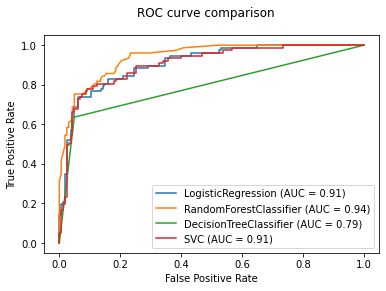

In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

# Plot ROC Curves
# Compare each model
log_reg_roc = plot_roc_curve(log_reg_best, cardio_prepared, cardio_target)
random_roc = plot_roc_curve(random_best, cardio_prepared, cardio_target, ax=log_reg_roc.ax_) # use axis same as above
dec_tree_roc = plot_roc_curve(dec_tree_best, cardio_prepared, cardio_target, ax=log_reg_roc.ax_)
SVC_roc = plot_roc_curve(SVC_best, cardio_prepared, cardio_target, ax=log_reg_roc.ax_)


log_reg_roc.figure_.suptitle("ROC curve comparison")
plt.show()

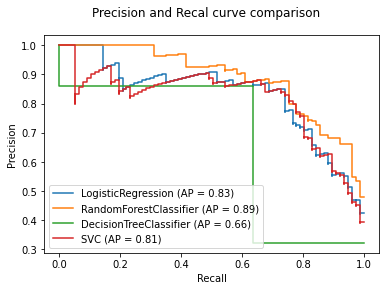

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

log_reg_recall = plot_precision_recall_curve(log_reg_best, cardio_prepared, cardio_target)
random_recall = plot_precision_recall_curve(random_best, cardio_prepared, cardio_target, ax=log_reg_recall.ax_) # use axis same as above
dec_tree_recall = plot_precision_recall_curve(dec_tree_best, cardio_prepared, cardio_target, ax=log_reg_recall.ax_)
SVC_recall = plot_precision_recall_curve(SVC_best, cardio_prepared, cardio_target, ax=log_reg_recall.ax_)

log_reg_recall.figure_.suptitle('Precision and Recal curve comparison');


# PART 5
**Test your best ML classifier using the test set.**


In [ ]:
# Best Model = RandomForestClassifier
# Use RandomForestClassifier with test set
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators' : [3, 10, 30],
    'max_features' : [2, 4, 6, 8,10],
    'max_depth':[1,2,3,4],
    'min_samples_split': [2,3,4],
     'min_samples_leaf': [1,2,3,4]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8,10], 'max_depth':[1,2,3,4], 
     'min_samples_split': [2,3,4], 'min_samples_leaf': [1,2,3,4]}
]

# create random forest model
random_cl_gs = RandomForestClassifier(random_state=42)
# create GridSearch object
grid_search = GridSearchCV(random_cl_gs, param_grid, cv=10, scoring = 'accuracy', return_train_score=True)

# use grid_search object, input training data
grid_search.fit(cardio_prepared, cardio_target)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None...
                          'max_features': [2, 4, 6, 8, 10],
                          'min_samples_leaf': [1, 2

In [ ]:
final_model = grid_search.best_estimator_

In [ ]:
X_test = strat_test_set.drop('DEATH_EVENT', axis = 1)
y_test = strat_test_set['DEATH_EVENT'].copy()


from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y_test)
y_test_encoded = lb.transform(y_test)
y_test_encoded
# use transform NOT fit.transform
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

print('Accuracy of the Random Forest Classifier model with the test data:', round(final_model.score(X_test_prepared, y_test_encoded),4))

Accuracy of the Random Forest Classifier model with the test data: 0.8333


Confusion Matrix:
[[39  2]
 [ 8 11]]


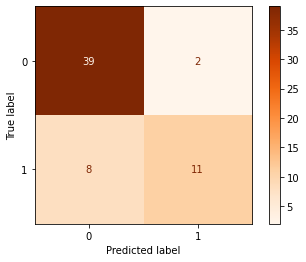

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        41
           1       0.85      0.58      0.69        19

    accuracy                           0.83        60
   macro avg       0.84      0.77      0.79        60
weighted avg       0.83      0.83      0.82        60



In [ ]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test_encoded,final_predictions, labels=[0,1]))
plot_confusion_matrix(final_model, X_test_prepared, y_test_encoded, cmap = 'Oranges')
plt.show()

print(metrics.classification_report(y_test_encoded, final_predictions, labels=[0,1]))